# Experiment with selic and ipca simulations

- [selic font](https://analisemacro.com.br/economia/indicadores/coletando-dados-da-selic-com-o-python/)

- [tabela códigos bcb](https://www.bcb.gov.br/estatisticas/indecoreestruturacao)

- [ipca font](https://analisemacro.com.br/economia/indicadores/analise-da-inflacao-brasileira-no-python/)

In [1]:
import pandas as pd
import numpy as np

from bcb import sgs
import sidrapy

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Config

colors = ['#282f6b', '#b22200', '#eace3f', '#224f20', '#b35c1e', '#419391', '#839c56','#3b89bc']
 
theme = {'figure.figsize' : (15, 10)}
 
sns.set_theme(rc = theme,
              palette = colors)

startdate = '2007-01-01'

In [3]:
selic = sgs.get(('selic', 432), start = startdate)

In [4]:
print(selic.to_markdown())

| Date                |   selic |
|:--------------------|--------:|
| 2007-01-01 00:00:00 |   13.25 |
| 2007-01-02 00:00:00 |   13.25 |
| 2007-01-03 00:00:00 |   13.25 |
| 2007-01-04 00:00:00 |   13.25 |
| 2007-01-05 00:00:00 |   13.25 |
| 2007-01-06 00:00:00 |   13.25 |
| 2007-01-07 00:00:00 |   13.25 |
| 2007-01-08 00:00:00 |   13.25 |
| 2007-01-09 00:00:00 |   13.25 |
| 2007-01-10 00:00:00 |   13.25 |
| 2007-01-11 00:00:00 |   13.25 |
| 2007-01-12 00:00:00 |   13.25 |
| 2007-01-13 00:00:00 |   13.25 |
| 2007-01-14 00:00:00 |   13.25 |
| 2007-01-15 00:00:00 |   13.25 |
| 2007-01-16 00:00:00 |   13.25 |
| 2007-01-17 00:00:00 |   13.25 |
| 2007-01-18 00:00:00 |   13.25 |
| 2007-01-19 00:00:00 |   13.25 |
| 2007-01-20 00:00:00 |   13.25 |
| 2007-01-21 00:00:00 |   13.25 |
| 2007-01-22 00:00:00 |   13.25 |
| 2007-01-23 00:00:00 |   13.25 |
| 2007-01-24 00:00:00 |   13.25 |
| 2007-01-25 00:00:00 |   13    |
| 2007-01-26 00:00:00 |   13    |
| 2007-01-27 00:00:00 |   13    |
| 2007-01-28 0

Text(0.5, 1.0, 'Taxa de juros - Meta Selic definida pelo Copom - $a.a')

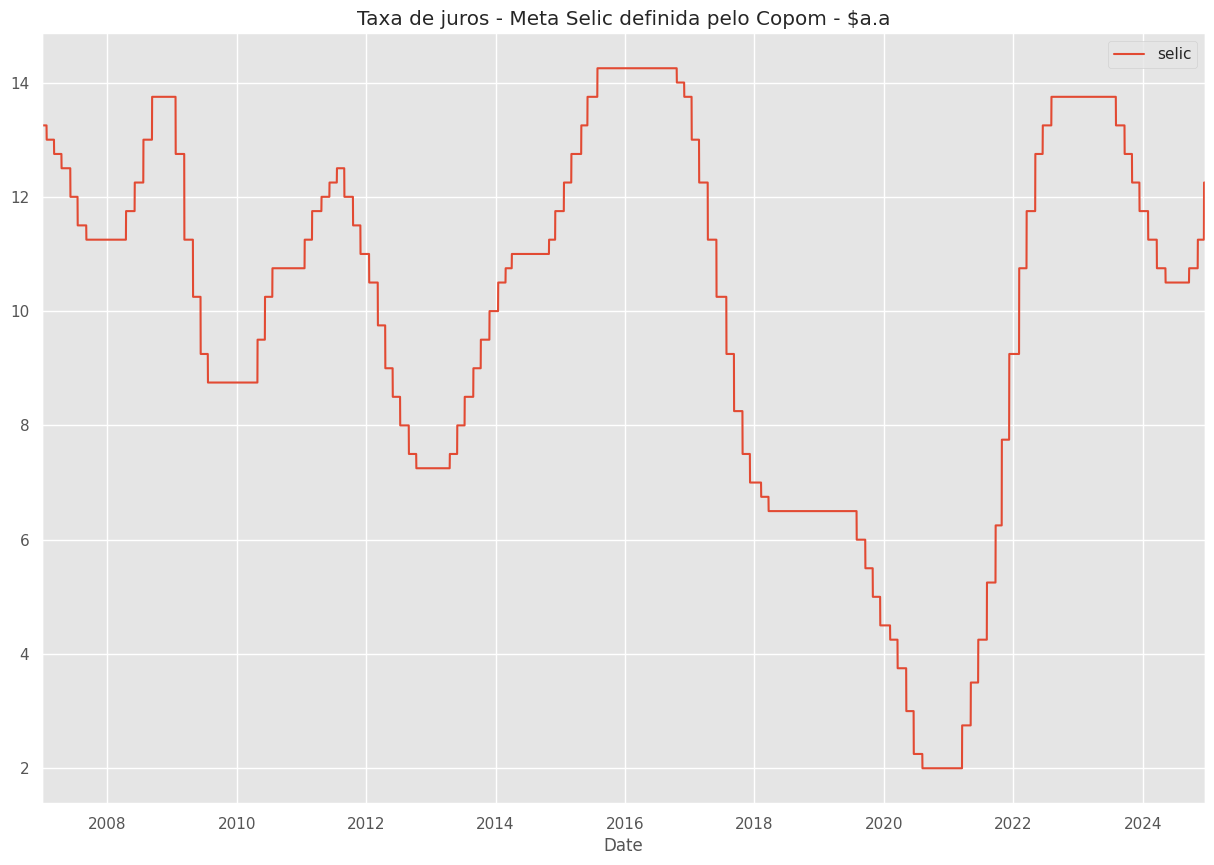

In [5]:
plt.style.use('ggplot')
selic.plot(figsize = (15, 10))
plt.title("Taxa de juros - Meta Selic definida pelo Copom - $a.a")

# IPCA

In [6]:
ipca_raw = sidrapy.get_table(table_code = '1737',
                             territorial_level = '1',
                             ibge_territorial_code = 'all',
                             variable = '63,69,2263,2264,2265',
                             period = 'last%20472')

In [7]:
ipca_raw.head()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Mês (Código),Mês,Variável (Código),Variável
1,1,Brasil,2,%,12.05,1,Brasil,198508,agosto 1985,63,IPCA - Variação mensal
2,1,Brasil,2,%,112.30,1,Brasil,198508,agosto 1985,69,IPCA - Variação acumulada no ano
3,1,Brasil,2,%,34.10,1,Brasil,198508,agosto 1985,2263,IPCA - Variação acumulada em 3 meses
4,1,Brasil,2,%,71.34,1,Brasil,198508,agosto 1985,2264,IPCA - Variação acumulada em 6 meses


In [8]:
# Clean IPCA

ipca = (ipca_raw
        .loc[1:,['V', 'D2C', 'D3N']]
        .rename(columns = {'V': 'value',
                           'D2C': 'date',
                           'D3N': 'variable'})
        .assign(variable = lambda x: x['variable'].replace({'IPCA - Variação mensal' : 'Var. mensal (%)',
                                                            'IPCA - Variação acumulada no ano': 'Var. acumulada no ano (%)', 
                                                            'IPCA - Variação acumulada em 3 meses' : 'Var. MM3M (%)',
                                                            'IPCA - Variação acumulada em 6 meses': 'Var. MM6M (%)',
                                                            'IPCA - Variação acumulada em 12 meses' : 'Var. MM12M (%)'}),
                date = lambda x: pd.to_datetime(x['date'],
                                                format = "%Y%m"),
                value = lambda x: x['value'].astype(float)
                )
        .pipe(lambda x: x.loc[x.date > startdate])
        .pivot_table(index='date', columns='variable', values='value', aggfunc='first')
        .reset_index()
)

In [9]:
print(ipca.to_markdown())

|     | date                |   Var. MM12M (%) |   Var. MM3M (%) |   Var. MM6M (%) |   Var. acumulada no ano (%) |   Var. mensal (%) |
|----:|:--------------------|-----------------:|----------------:|----------------:|----------------------------:|------------------:|
|   0 | 2007-02-01 00:00:00 |             3.02 |            1.37 |            2.23 |                        0.88 |              0.44 |
|   1 | 2007-03-01 00:00:00 |             2.96 |            1.26 |            2.39 |                        1.26 |              0.37 |
|   2 | 2007-04-01 00:00:00 |             3    |            1.06 |            2.31 |                        1.51 |              0.25 |
|   3 | 2007-05-01 00:00:00 |             3.18 |            0.9  |            2.28 |                        1.79 |              0.28 |
|   4 | 2007-06-01 00:00:00 |             3.69 |            0.81 |            2.08 |                        2.08 |              0.28 |
|   5 | 2007-07-01 00:00:00 |             3.74 |       

Text(1.0, -0.08, 'Fonte: Sidra/IBGE')

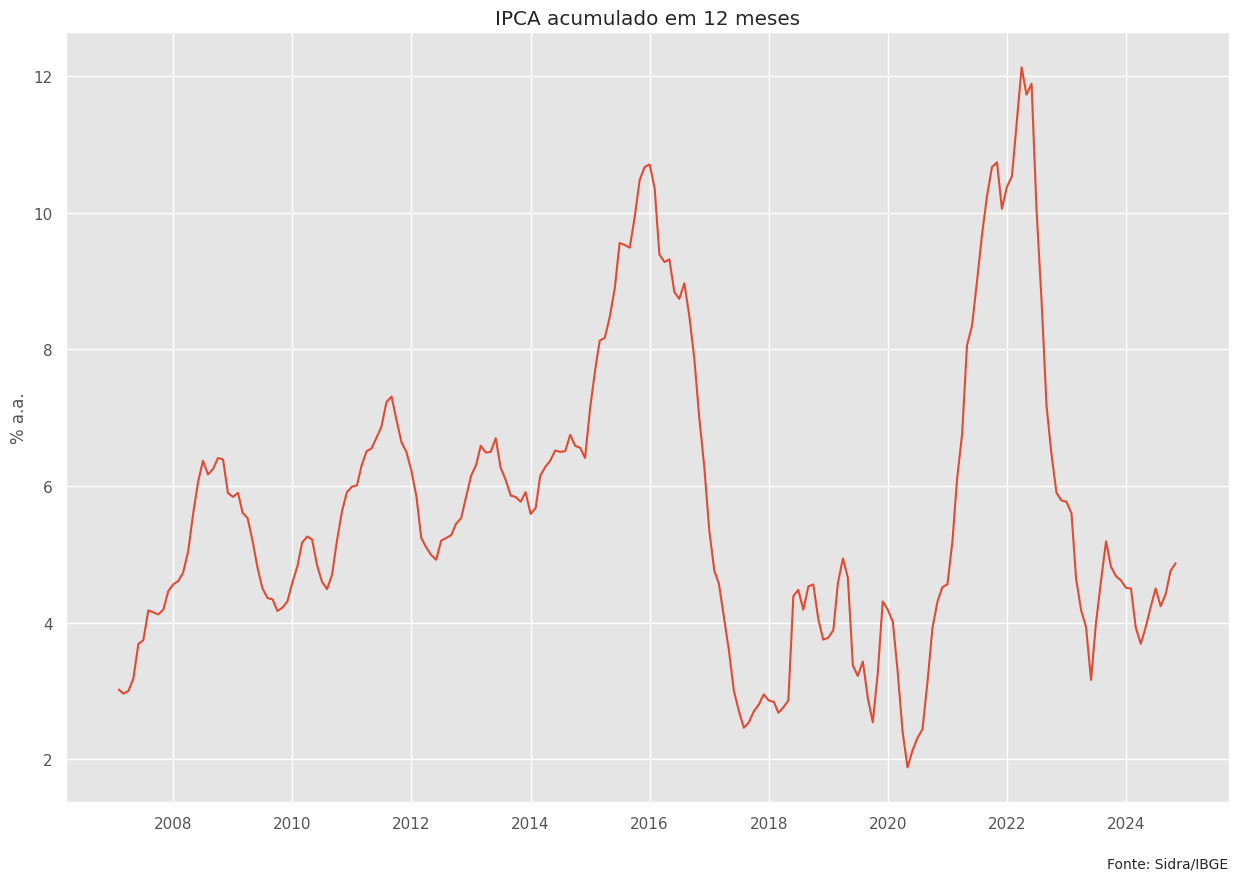

In [10]:
ipca_12m = ipca[['date', 'Var. MM12M (%)']]


sns.lineplot(x = 'date',
             y = 'Var. MM12M (%)',
             data = ipca_12m).set(title = 'IPCA acumulado em 12 meses',
                                                           xlabel = '',
                                                           ylabel = '% a.a.')
 

plt.annotate('Fonte: Sidra/IBGE',
            xy = (1.0, -0.08),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)

In [11]:
print(ipca.to_markdown())

|     | date                |   Var. MM12M (%) |   Var. MM3M (%) |   Var. MM6M (%) |   Var. acumulada no ano (%) |   Var. mensal (%) |
|----:|:--------------------|-----------------:|----------------:|----------------:|----------------------------:|------------------:|
|   0 | 2007-02-01 00:00:00 |             3.02 |            1.37 |            2.23 |                        0.88 |              0.44 |
|   1 | 2007-03-01 00:00:00 |             2.96 |            1.26 |            2.39 |                        1.26 |              0.37 |
|   2 | 2007-04-01 00:00:00 |             3    |            1.06 |            2.31 |                        1.51 |              0.25 |
|   3 | 2007-05-01 00:00:00 |             3.18 |            0.9  |            2.28 |                        1.79 |              0.28 |
|   4 | 2007-06-01 00:00:00 |             3.69 |            0.81 |            2.08 |                        2.08 |              0.28 |
|   5 | 2007-07-01 00:00:00 |             3.74 |       

Text(1.0, -0.13, 'Fonte: Sidra/IBGE')

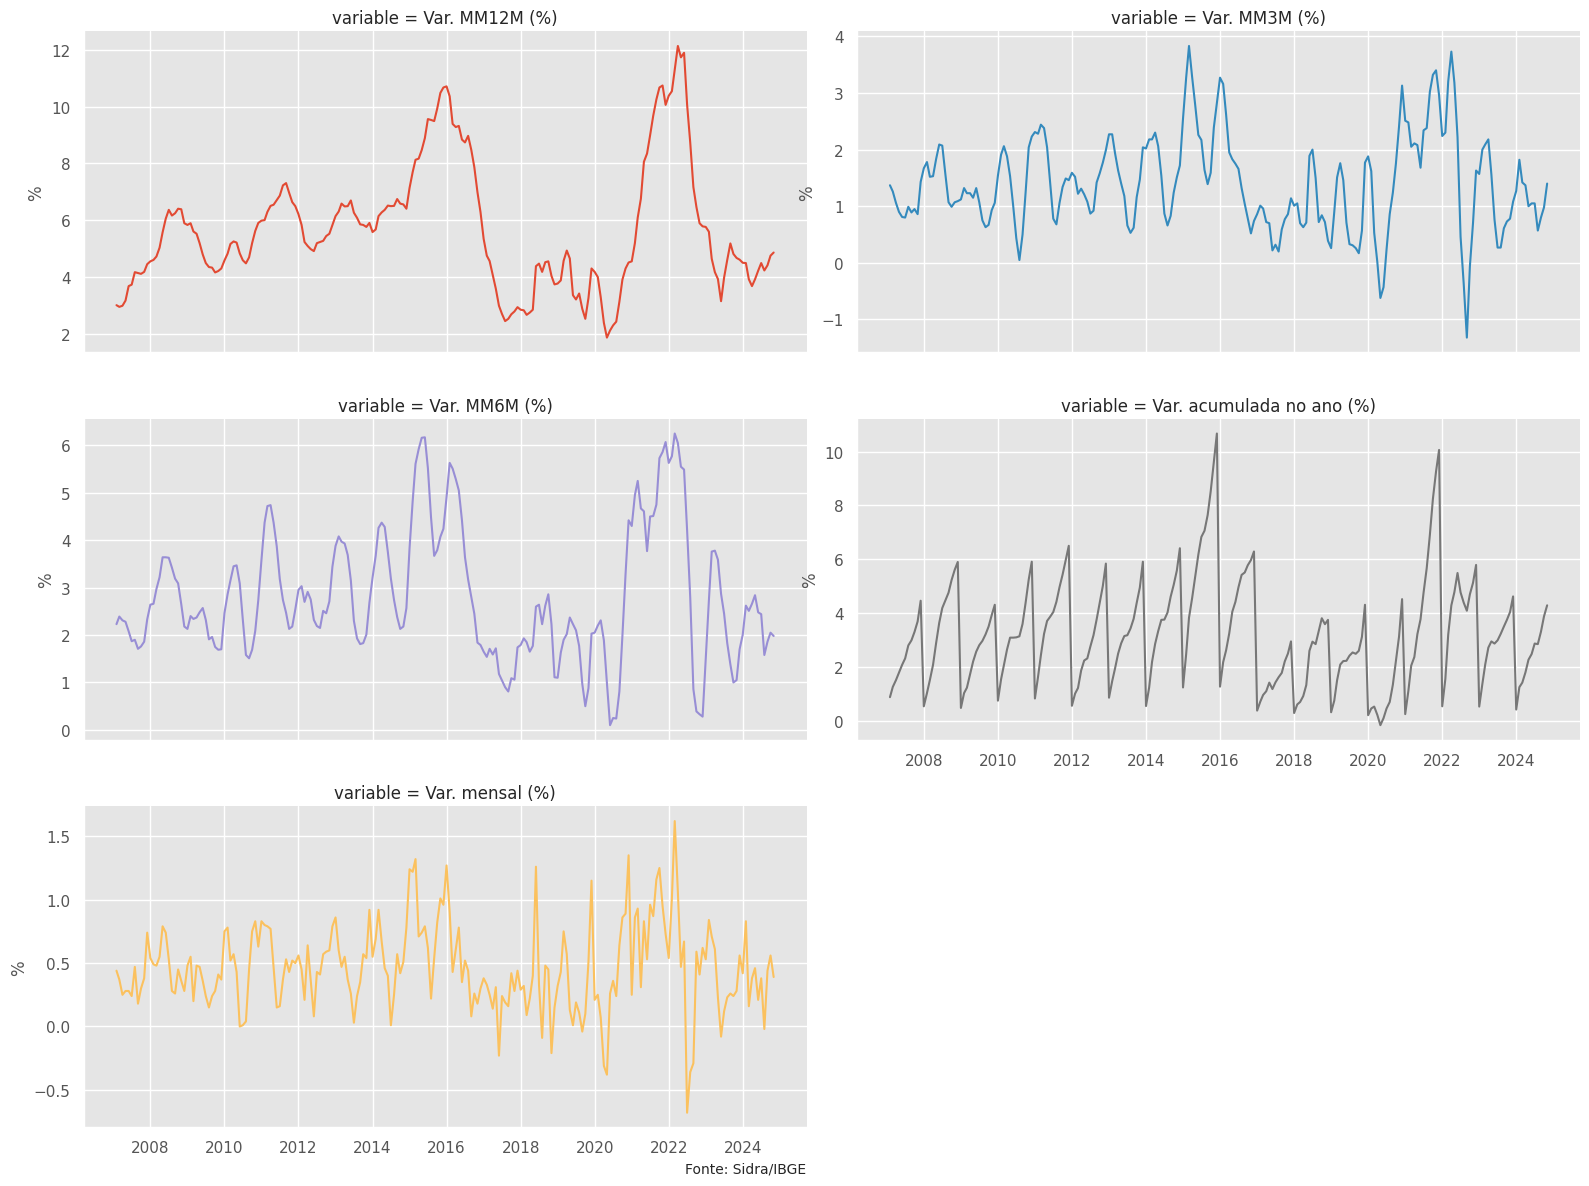

In [12]:
g = sns.FacetGrid(ipca.melt(id_vars='date', value_vars=ipca.columns[1:]),
                  col = 'variable',
                  col_wrap = 2,
                  hue = 'variable',
                  sharey = False,
                  height = 4,
                  aspect = 2)
 
 
g.map_dataframe(sns.lineplot, 
                x = 'date',
                y = 'value').set(xlabel = "",
                                 ylabel = '%')
 
plt.annotate('Fonte: Sidra/IBGE',
            xy = (1.0, -0.13),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)

# IPCA per category

In [13]:
ipca_gp_raw = sidrapy.get_table(table_code = '7060',
                             territorial_level = '1',
                             ibge_territorial_code = 'all',
                             variable = '63,66',
                             period = 'all',
                             classification = '315/7170,7445,7486,7558,7625,7660,7712,7766,7786'
                             )


ipca_gp =  (
    ipca_gp_raw
    .loc[1:,['V', 'D2C', 'D3N', 'D4N']]
    .rename(columns = {'V': 'value',
                       'D2C': 'date',
                       'D3N': 'variable',
                       'D4N': 'groups'})
    .assign(variable = lambda x: x['variable'].replace({'IPCA - Variação mensal' : 'variacao',
                                                        'IPCA - Peso mensal': 'peso'}),
            date  = lambda x: pd.to_datetime(x['date'],
                                              format = "%Y%m"),
            value = lambda x: x['value'].astype(float),
            groups = lambda x: x['groups'].astype(str)
           )
    .pipe(lambda x: x.loc[x.date > '2007-01-01'])
        )

In [14]:
ipca_gp.head()

,value,date,variable,groups
1,0.39,2020-01-01,variacao,1.Alimentação e bebidas
2,0.55,2020-01-01,variacao,2.Habitação
3,-0.07,2020-01-01,variacao,3.Artigos de residência
4,-0.48,2020-01-01,variacao,4.Vestuário
5,0.32,2020-01-01,variacao,5.Transportes


In [15]:
ipca_gp_wider = (
    ipca_gp
    .pivot_table(index = ['date', 'groups'],
                 columns = 'variable',
                 values = 'value')
    .reset_index()
    .assign(contribuicao = lambda x: (x.peso * x.variacao) / 100)
                )
	

	
# Plota a contribuição de cada grupo com plotly
px.bar(ipca_gp_wider,
       x = 'date',
       y = 'contribuicao',
       color = 'groups',
       color_discrete_sequence = colors)


In [16]:
selic = selic.rename_axis('data').reset_index()

In [19]:
import plotly.graph_objects as go


# Merge with forward fill for IPCA data
merged_data = (selic
               .rename(columns={'selic': 'Selic (%)'})
               .merge(ipca[['date', 'Var. MM12M (%)']],
                      left_on='data',
                      right_on='date',
                      how='left')  # Left join to keep all Selic dates
               .drop(columns=['date'])
               .rename(columns={'data': 'Date', 'Var. MM12M (%)': 'IPCA 12M (%)'})
               .sort_values(by='Date')
               .fillna(method='ffill'))  # Forward-fill the IPCA data

# Plot with Plotly
fig = go.Figure()

# Add Selic line
fig.add_trace(go.Scatter(x=merged_data['Date'],
                         y=merged_data['Selic (%)'],
                         mode='lines',
                         name='Selic (%)',
                         line=dict(width=2)))

# Add IPCA line
fig.add_trace(go.Scatter(x=merged_data['Date'],
                         y=merged_data['IPCA 12M (%)'],
                         mode='lines',
                         name='IPCA 12M (%)',
                         line=dict(width=2)))

# Update layout
fig.update_layout(title='Selic and IPCA (12 Months) Comparison',
                  xaxis_title='Date',
                  yaxis_title='% a.a.',
                  template='plotly',
                  legend=dict(x=0, y=1, traceorder='normal'),
                  width=900, height=600,
                  annotations=[
                      dict(text='Fonte: Sidra/IBGE e BCB',
                           x=0.95, y=-0.2,
                           xref='paper', yref='paper',
                           showarrow=False,
                           font=dict(size=10))
                  ])

# Show plot
fig.show()


/tmp/ipykernel_9258/2236390556.py:5: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [19]:
import requests
import pandas as pd
import numpy as np

def get_selic_data():
    # API URL for Selic data
    selic_12m_url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.1178/dados?formato=json"
    selic_monthly_url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.4390/dados?formato=json"

    # Fetch data
    selic_12m = requests.get(selic_12m_url).json()
    selic_monthly = requests.get(selic_monthly_url).json()

    # Convert to DataFrame
    selic_12m_df = pd.DataFrame(selic_12m)
    selic_monthly_df = pd.DataFrame(selic_monthly)

    # Process Data
    selic_12m_df['data'] = pd.to_datetime(selic_12m_df['data'], dayfirst=True)
    selic_12m_df['valor'] = selic_12m_df['valor'].astype(float)
    selic_12m_df = selic_12m_df.rename(columns={'valor': 'selic_12m'})

    selic_monthly_df['data'] = pd.to_datetime(selic_monthly_df['data'], dayfirst=True)
    selic_monthly_df['valor'] = selic_monthly_df['valor'].astype(float)
    selic_monthly_df = selic_monthly_df.rename(columns={'valor': 'selic_monthly'})

    # Merge data on date
    selic_df = pd.merge(selic_monthly_df, selic_12m_df, on='data', how='inner')
    return selic_df

def transform_monthly_to_annual(selic_monthly):
    # Compound the monthly Selic to get the annual rate
    compounded_annual = (np.prod(1 + selic_monthly / 100) - 1) * 100
    compounded_annual = (np.sum(selic_monthly))
    return compounded_annual

def transform_annual_to_monthly(selic_annual):
    # Derive the monthly rate from the annual Selic
    monthly_rate = ((1 + selic_annual / 100) ** (1/12) - 1) * 100
    return monthly_rate

def validate_selic_transformations():
    selic_df = get_selic_data()

    # Calculate compound annual rate from monthly
    selic_df['compounded_annual'] = selic_df['selic_monthly'].rolling(12).apply(
        lambda x: transform_monthly_to_annual(x) if len(x) == 12 else np.nan, raw=True
    )

    # Compare with reported 12-month Selic
    selic_df['difference'] = abs(selic_df['compounded_annual'] - selic_df['selic_12m'])

    # Display comparison
    comparison_result = selic_df[['data', 'selic_monthly', 'selic_12m', 'compounded_annual', 'difference']]
    diff = comparison_result["difference"].values
    ii = ~np.isnan(diff)
    average_diff = np.mean(diff[ii])
    print(comparison_result.tail(15))
    print("\nValidation Result: Transformation is correct if 'difference' is close to 0.")
    print(f"Averge difference:  {average_diff:.4f}")


if __name__ == "__main__":
    validate_selic_transformations()

          data  selic_monthly  selic_12m  compounded_annual  difference
256 2022-12-01           1.12      13.65              10.31        3.34
257 2023-02-01           0.92      13.65              10.79        2.86
258 2023-03-01           1.17      13.65              11.47        2.18
259 2023-06-01           1.07      13.65              11.95        1.70
260 2023-08-01           1.14      13.65              12.32        1.33
261 2023-09-01           0.97      13.15              12.53        0.62
262 2023-11-01           0.92      12.65              12.62        0.03
263 2023-12-01           0.89      12.15              12.49        0.34
264 2024-02-01           0.80      11.15              12.26        1.11
265 2024-03-01           0.83      11.15              11.92        0.77
266 2024-04-01           0.89      10.65              11.74        1.09
267 2024-07-01           0.91      10.40              11.63        1.23
268 2024-08-01           0.87      10.40              11.38     